In [1]:
# Мне нужно предсказать значение колонки loss на тесте,
# физический смысл которой - плата страховой компании по i-му страховому случаю
import pandas as pd

train_df = pd.read_csv('train.csv')
train_df.drop_duplicates(inplace=True)
train_df = train_df.drop('id', axis=1)
y_train_df = train_df[['loss']]
train_df = train_df.drop('loss', axis=1)
train_df.head(5)

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,A,B,A,B,A,A,A,A,B,A,...,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843
1,A,B,A,A,A,A,A,A,B,B,...,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496
2,A,B,A,A,B,A,A,A,B,B,...,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425
3,B,B,A,B,A,A,A,A,B,A,...,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642
4,A,B,A,B,A,A,A,A,B,B,...,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606


In [2]:
train_df.tail(5)

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
188313,A,B,A,A,A,A,A,A,B,A,...,0.939556,0.242437,0.289949,0.24564,0.30859,0.32935,0.223038,0.220003,0.333292,0.208216
188314,A,A,A,A,A,B,A,A,A,A,...,0.704268,0.334270,0.382000,0.63475,0.40455,0.47779,0.307628,0.301921,0.318646,0.305872
188315,A,B,A,A,A,A,A,B,B,A,...,0.482436,0.345883,0.370534,0.24564,0.45808,0.47779,0.445614,0.443374,0.339244,0.503888
188316,A,B,A,A,A,A,A,A,B,B,...,0.340543,0.704364,0.562866,0.34987,0.44767,0.53881,0.863052,0.852865,0.654753,0.721707
188317,B,A,A,B,A,A,A,A,A,A,...,0.281143,0.844563,0.533048,0.97123,0.93383,0.83814,0.932195,0.946432,0.810511,0.721460


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 130 entries, cat1 to cont14
dtypes: float64(14), object(116)
memory usage: 186.8+ MB


In [4]:
train_df.describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717
std,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722
25%,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403
75%,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623
max,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848


In [5]:
train_df.shape

(188318, 130)

In [6]:
# Смотрим кол-во нулевых значений
missing_count = train_df.isnull().sum()
missing_count = missing_count[missing_count > 0]
missing_count
# Видим, что пропусков и НаН нету, значит убирать их или использовать imputers не требуется

Series([], dtype: int64)

In [7]:
# Проверяем числовые колонки на нормальность распределения
from scipy.stats import normaltest
import numpy as np

numeric_cols = train_df.select_dtypes(include=[np.number]).columns
count_abnormal = 0
for col in numeric_cols:
    stat, p_value = normaltest(train_df[col])
    if p_value <= 0.05:
        count_abnormal += 1
print(f"Процент ненормальных: {count_abnormal/len(numeric_cols)*100:.1f}%")
# Видим, что все числовые фичи распределены ненормально => используем RobustScaler, а не MinMaxScaler


Процент ненормальных: 100.0%


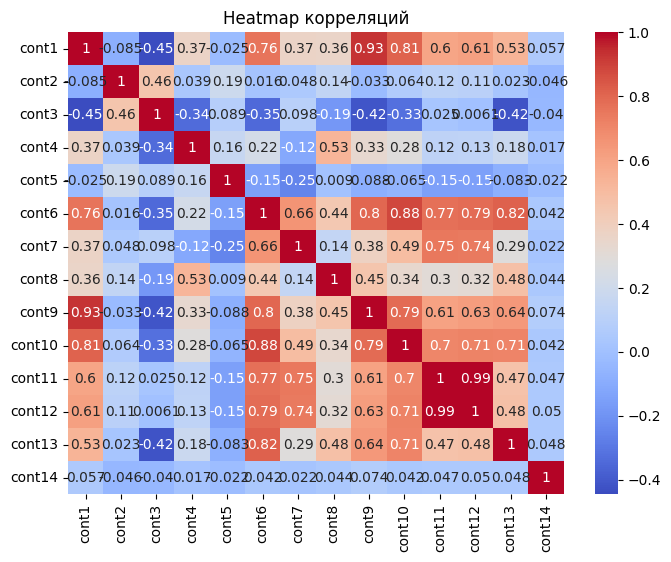

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
df_num = train_df[numeric_cols]
correlation_matrix = df_num.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, 
            annot=True,   # Показать значения на карте
            cmap='coolwarm') # Цветовая схема
plt.title('Heatmap корреляций')
plt.show()

In [9]:
df_clean = train_df[numeric_cols].copy()
    
corr_matrix = df_clean.corr().abs()

upper_tri = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

to_drop = [
    column for column in upper_tri.columns 
    if any(upper_tri[column] > 0.88)
]

# Удаляем колонки
df_clean = df_clean.drop(columns=to_drop)
df = df_clean


In [10]:
# т.к. датасет и так очень большой, чтобы не раздувать его ещё сильнее, будем использовать LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, RobustScaler

categorical_cols = train_df.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()

# LabelEncoder не работает в ColumnTransformer, поэтому используем аналог
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numeric_cols),
        ('cat', OrdinalEncoder(
            handle_unknown='use_encoded_value',  # Обрабатываем неизвестные категории
            unknown_value=-1                     # Присваиваем им значение -1
        ), categorical_cols)
    ]
)

X_train_processed = preprocessor.fit_transform(train_df)

scaler = RobustScaler()
y_train_scaled = scaler.fit_transform(y_train_df)


# Преобразуем в df
feature_names = numeric_cols + categorical_cols
X_train_df = pd.DataFrame(X_train_processed, columns=feature_names, index=train_df.index)
y_train_df = pd.DataFrame(y_train_scaled, columns=['loss'], index=train_df.index)



print("Обработанные данные:")
print(y_train_df.head(5))

Обработанные данные:
       loss
0  0.036701
1 -0.312819
2  0.334458
3 -0.442069
4  0.243752


In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X_train_df, y_train_df, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

In [12]:
# Обучаем

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError

simple_model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1),]
)
simple_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae', RootMeanSquaredError()]
)
simple_model.summary()

C:\Users\User\jupyter_projects\lab1_ml\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         8,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,497 (41.00 KB)

 Trainable params: 10,497 (41.00 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history_simple = simple_model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)

Epoch 1/100
3767/3767 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 1.1383 - mae: 0.6348 - root_mean_squared_error: 1.0669 - val_loss: 0.6687 - val_mae: 0.5312 - val_root_mean_squared_error: 0.8177
Epoch 2/100
3767/3767 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.6895 - mae: 0.5517 - root_mean_squared_error: 0.8304 - val_loss: 0.6374 - val_mae: 0.4977 - val_root_mean_squared_error: 0.7984
Epoch 3/100
3767/3767 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.6295 - mae: 0.5179 - root_mean_squared_error: 0.7934 - val_loss: 0.6317 - val_mae: 0.5363 - val_root_mean_squared_error: 0.7948
Epoch 4/100
3767/3767 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.6008 - mae: 0.4991 - root_mean_squared_error: 0.7751 - val_loss: 0.6028 - val_mae: 0.4963 - val_root_mean_squared_error: 0.7764
Epoch 5/100
3767/3767 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.5873 - mae: 0.4900 - root_mean_squared_error: 0.7664 - val_loss: 0.5951 - val_mae: 0.4852 - val_root_mean_squared_error: 0.7714
Epoch 6/100
3767/3767 ━━━━━━━━━━━━━

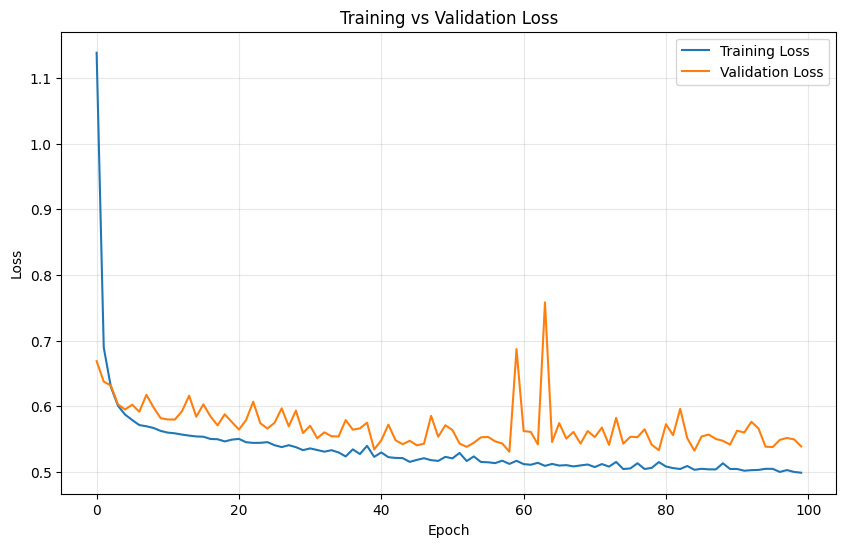

In [14]:
import matplotlib.pyplot as plt


# Строим график loss
plt.figure(figsize=(10, 6))
plt.plot(history_simple.history['loss'], label='Training Loss')
plt.plot(history_simple.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [15]:
# Нейронка переобучается, но не сильно

In [16]:
complex_model = Sequential(
    [Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)]
)
complex_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae', RootMeanSquaredError()]
)
complex_model.summary()

C:\Users\User\jupyter_projects\lab1_ml\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │        16,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,137 (106.00 KB)

 Trainable params: 27,137 (106.00 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history_complex = complex_model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)

Epoch 1/100
3767/3767 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 1.6482 - mae: 0.7784 - root_mean_squared_error: 1.2838 - val_loss: 0.6973 - val_mae: 0.5175 - val_root_mean_squared_error: 0.8350
Epoch 2/100
3767/3767 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.6863 - mae: 0.5347 - root_mean_squared_error: 0.8284 - val_loss: 0.7486 - val_mae: 0.5146 - val_root_mean_squared_error: 0.8652
Epoch 3/100
3767/3767 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.6318 - mae: 0.5070 - root_mean_squared_error: 0.7949 - val_loss: 0.6342 - val_mae: 0.5025 - val_root_mean_squared_error: 0.7964
Epoch 4/100
3767/3767 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.6138 - mae: 0.4966 - root_mean_squared_error: 0.7835 - val_loss: 0.6656 - val_mae: 0.5616 - val_root_mean_squared_error: 0.8158
Epoch 5/100
3767/3767 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.6034 - mae: 0.4948 - root_mean_squared_error: 0.7768 - val_loss: 0.6908 - val_mae: 0.5390 - val_root_mean_squared_error: 0.8312
Epoch 6/100
3767/3767 ━━━━━━━━━━━━━

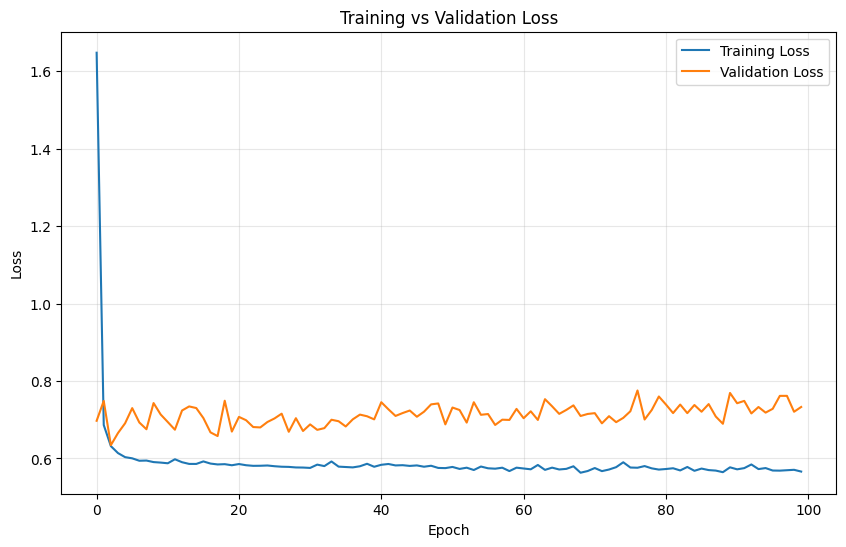

In [18]:
import matplotlib.pyplot as plt


# Строим график loss
plt.figure(figsize=(10, 6))
plt.plot(history_complex.history['loss'], label='Training Loss')
plt.plot(history_complex.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [19]:
# Видно, что нейронка жёстко переобучается

In [20]:
train_loss_cm = history_complex.history['loss']
val_loss_cm = history_complex.history['val_loss']
val_loss_cm[-1] - train_loss_cm[-1]

0.16689711809158325

In [21]:
# Видим, что модель переобучается
# Применим модель к тестовым данным

test_predictions_sm = simple_model.predict(x_test, verbose=0)
test_predictions_cm = complex_model.predict(x_test, verbose=0)
test_predictions_cm, test_predictions_sm

(array([[0.34318435],
        [0.27683517],
        [0.51209   ],
        ...,
        [0.24254864],
        [0.79234636],
        [0.2107265 ]], shape=(37664, 1), dtype=float32),
 array([[-0.01907098],
        [-0.2677744 ],
        [ 0.4916389 ],
        ...,
        [-0.2599553 ],
        [ 0.7229762 ],
        [-0.2757923 ]], shape=(37664, 1), dtype=float32))

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Вычисляем метрики
test_mae_sm = mean_absolute_error(y_test, test_predictions_sm)
test_mse_sm = mean_squared_error(y_test, test_predictions_sm)
test_rmse_sm = np.sqrt(test_mse_sm)

test_mae_cm = mean_absolute_error(y_test, test_predictions_cm)
test_mse_cm = mean_squared_error(y_test, test_predictions_cm)
test_rmse_cm = np.sqrt(test_mse_cm)

print("Метрики на тесте: простая модель ")
print(f"MAE:  {test_mae_sm:.4f}")
print(f"RMSE: {test_rmse_sm:.4f}")

print("Метрики на тесте: сложная модель ")
print(f"MAE:  {test_mae_cm:.4f}")
print(f"RMSE: {test_rmse_cm:.4f}")
# Выполняем обратное масштабирование
y_test = scaler.inverse_transform(y_test)

Метрики на тесте: простая модель 
MAE:  0.4572
RMSE: 0.7242
Метрики на тесте: сложная модель 
MAE:  0.6236
RMSE: 0.8297


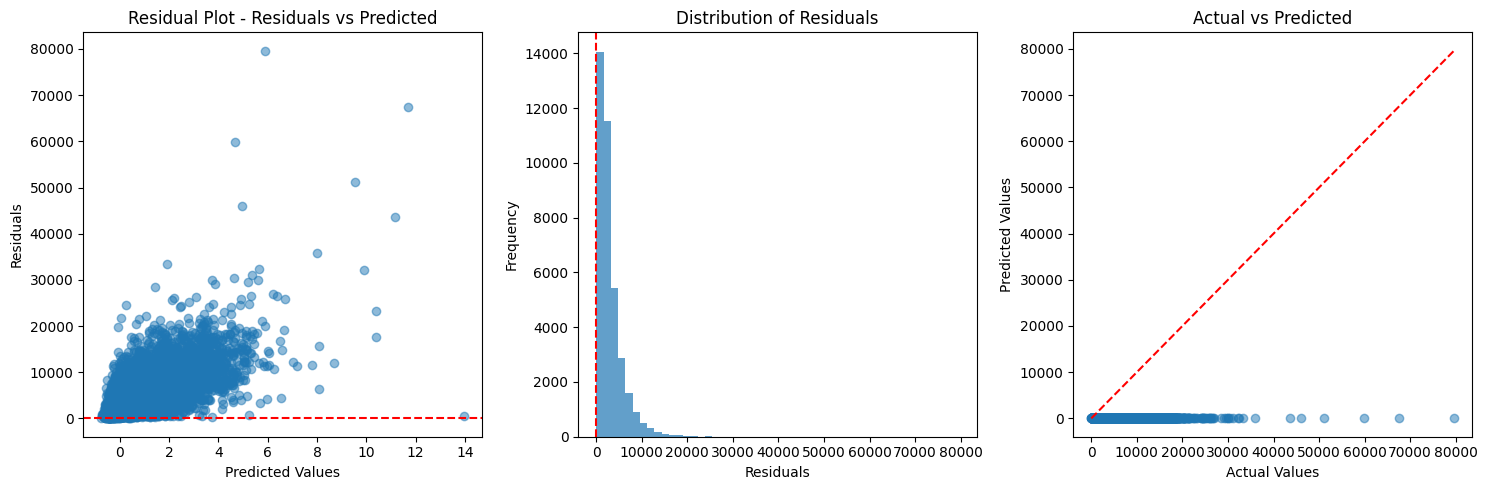

In [23]:
import matplotlib.pyplot as plt

def plot_residuals(y_true, y_pred, title="Residual Plot"):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    residuals = y_true - y_pred
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'{title} - Residuals vs Predicted')
    
    plt.subplot(1, 3, 2)
    plt.hist(residuals, bins=50, alpha=0.7)
    plt.axvline(x=0, color='red', linestyle='--')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Distribution of Residuals')
    
    plt.subplot(1, 3, 3)
    plt.scatter(y_true, y_pred, alpha=0.5)
    # Линия идеальных предсказаний
    max_val = max(y_true.max(), y_pred.max())
    min_val = min(y_true.min(), y_pred.min())
    plt.plot([min_val, max_val], [min_val, max_val], 'red', linestyle='--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted')
    
    plt.tight_layout()
    plt.show()


plot_residuals(y_test, test_predictions_sm)

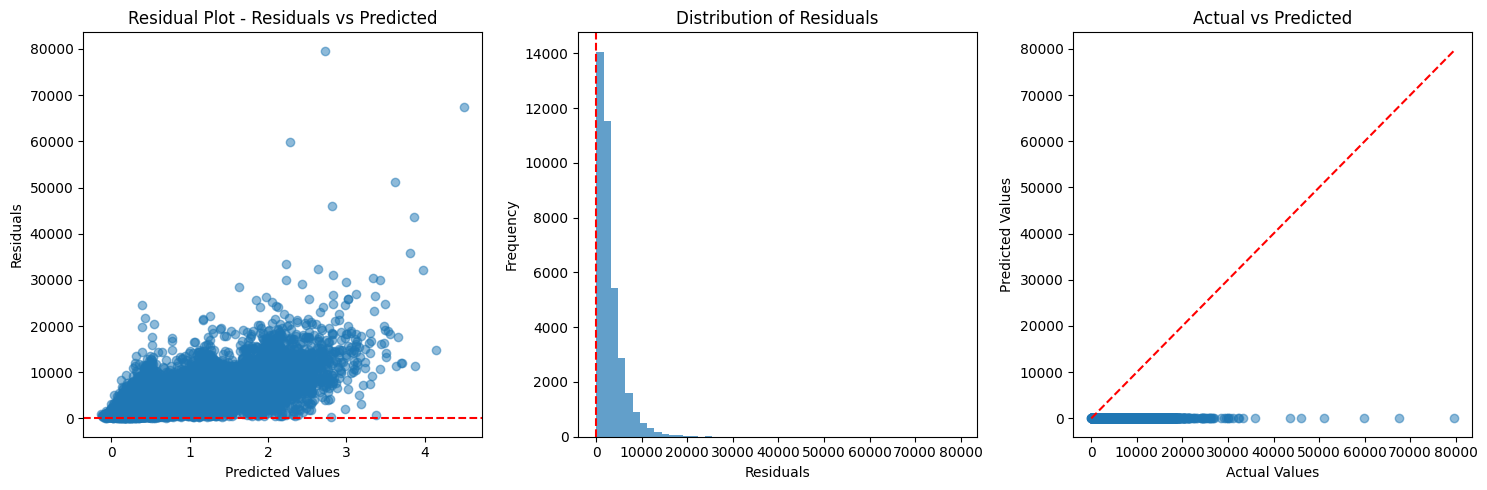

In [24]:
plot_residuals(y_test, test_predictions_cm)

In [25]:
# По графикам видно, что модели (особенно "сложная") систематически выдают результат больше истинного(распределение остатков смещено вправо)
